### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

### Загрузка датасета

In [2]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Задание 1
Построение графиков: Создайте несколько графиков, которые визуализируют основные характеристики датасета.

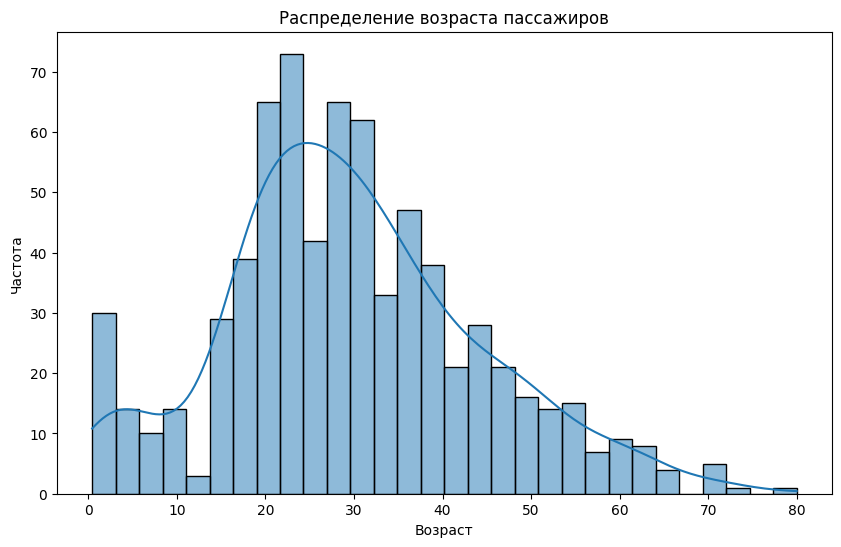

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

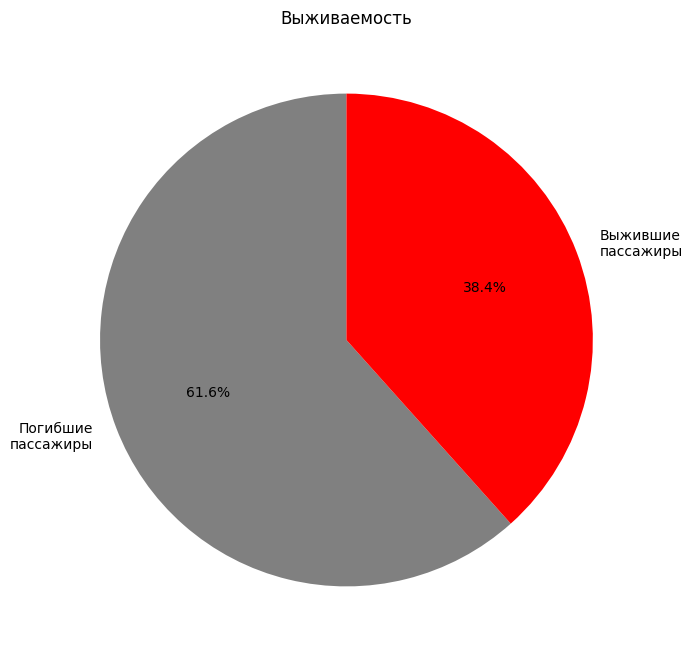

In [4]:
plt.figure(figsize=(8, 8))
titanic['Survived'].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90,
        labels=["Погибшие\nпассажиры", "Выжившие\nпассажиры"],
        colors=["gray", "red"]
        )
plt.title('Выживаемость')
plt.ylabel('')
plt.show()


C:\Users\Sai\AppData\Local\Temp\ipykernel_8208\213561156.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex',
C:\Users\Sai\AppData\Local\Temp\ipykernel_8208\213561156.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ).set_xticklabels(['Мужчины', 'Женщины'])


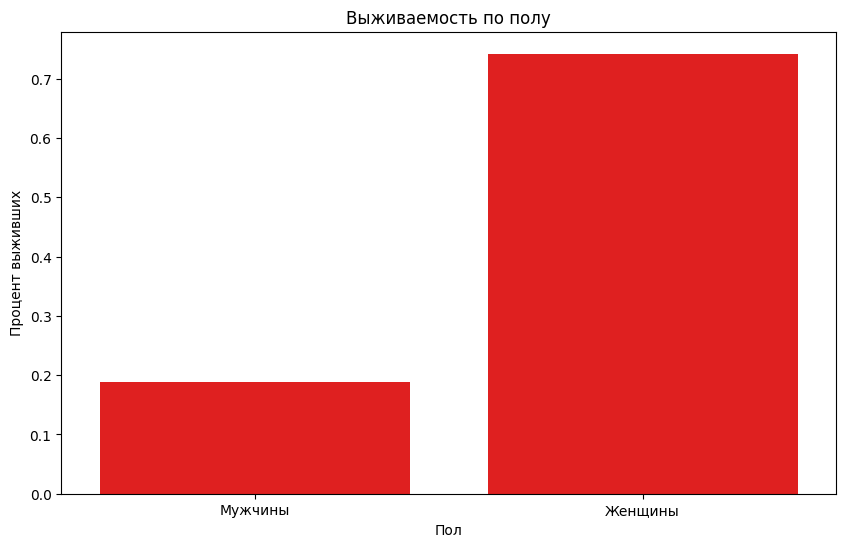

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', 
            y='Survived', 
            data=titanic, 
            ci=None, 
            color="red",
            legend=["Погибшие\nпассажиры", "Выжившие\nпассажиры"]
            ).set_xticklabels(['Мужчины', 'Женщины'])
plt.title('Выживаемость по полу')
plt.xlabel('Пол')
plt.ylabel('Процент выживших')
plt.show()

<Axes: title={'center': 'Тепловая карта корреляции'}>

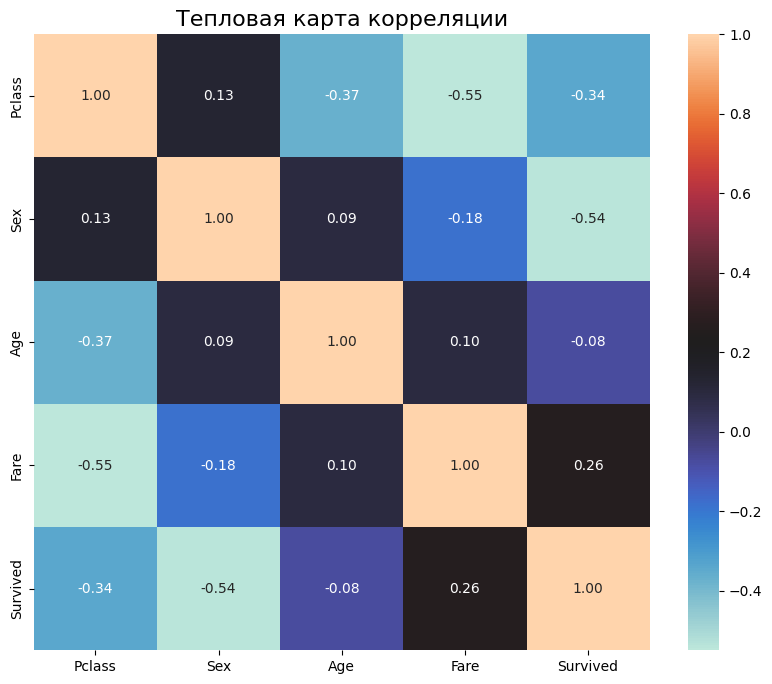

In [6]:
titanic["Sex"] = titanic["Sex"].apply(lambda x: int(x == "male"))
del titanic["PassengerId"]

cov_matrix = titanic.loc[:,["Pclass", "Sex", "Age", "Fare", "Survived"]].corr()
plt.figure(figsize=(10, 8))
plt.title("Тепловая карта корреляции", fontsize=16)
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='icefire', square=True)

### Задание 2
Диаграмма рассеяния: Постройте диаграмму рассеяния (scatter plot) для визуализации зависимости переменных.

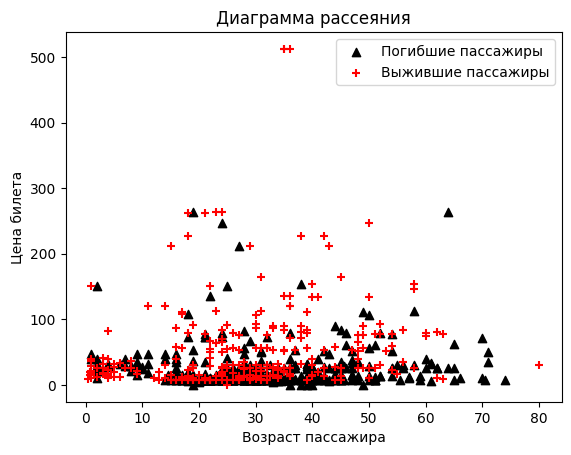

In [7]:
plt.scatter(titanic.loc[titanic["Survived"] == 0, "Age"], titanic.loc[titanic["Survived"] == 0, "Fare"], 
            marker="^",
            color="black",
            label="Погибшие пассажиры")

plt.scatter(titanic.loc[titanic["Survived"] == 1, "Age"], titanic.loc[titanic["Survived"] == 1, "Fare"], 
            marker="+",
            color="red",
            label="Выжившие пассажиры")

plt.ylabel("Цена билета")
plt.xlabel("Возраст пассажира")
plt.title("Диаграмма рассеяния")
plt.legend()

### Задание 3
 Столбчатая диаграмма: Постройте столбчатую диаграмму для сравнения выживаемости пассажиров в зависимости от пола или класса билета.

C:\Users\Sai\AppData\Local\Temp\ipykernel_8208\192002924.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic, ci=None, color="red")


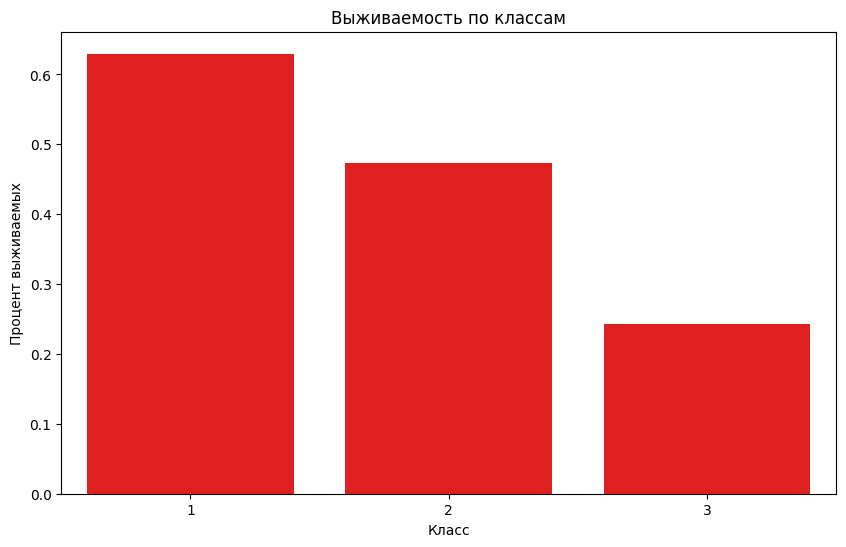

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic, ci=None, color="red")
plt.title('Выживаемость по классам')
plt.xlabel('Класс')
plt.ylabel('Процент выживаемых')
plt.show()

### Задание 4
Боксплоты: Постройте boxplot (диаграмму размаха) для анализа распределения возраста пассажиров в зависимости от их выживаемости. 

C:\Users\Sai\AppData\Local\Temp\ipykernel_8208\3939526259.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(x='Survived', y='Age', data=titanic, color="red").set_xticklabels(['Погибшие пассажиры', 'Выжившие пассажиры'])


Text(0, 0.5, 'Возраст')

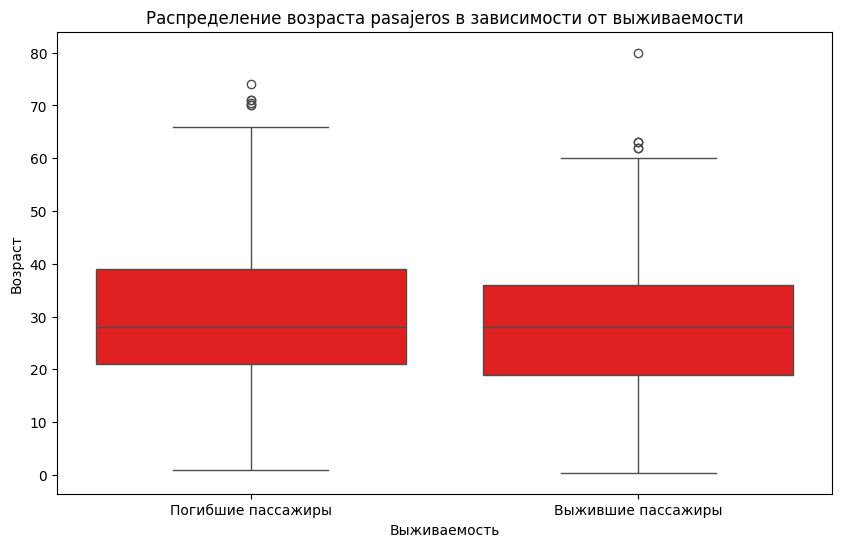

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic, color="red").set_xticklabels(['Погибшие пассажиры', 'Выжившие пассажиры'])
plt.title('Распределение возраста pasajeros в зависимости от выживаемости')
plt.xlabel('Выживаемость')
plt.ylabel('Возраст')

### Задание 5
Круговая диаграмма: Постройте круговую диаграмму для визуализации распределения пассажиров по полу или классу. 

Text(0.5, 1.0, 'Распределение возраста пассажиров')

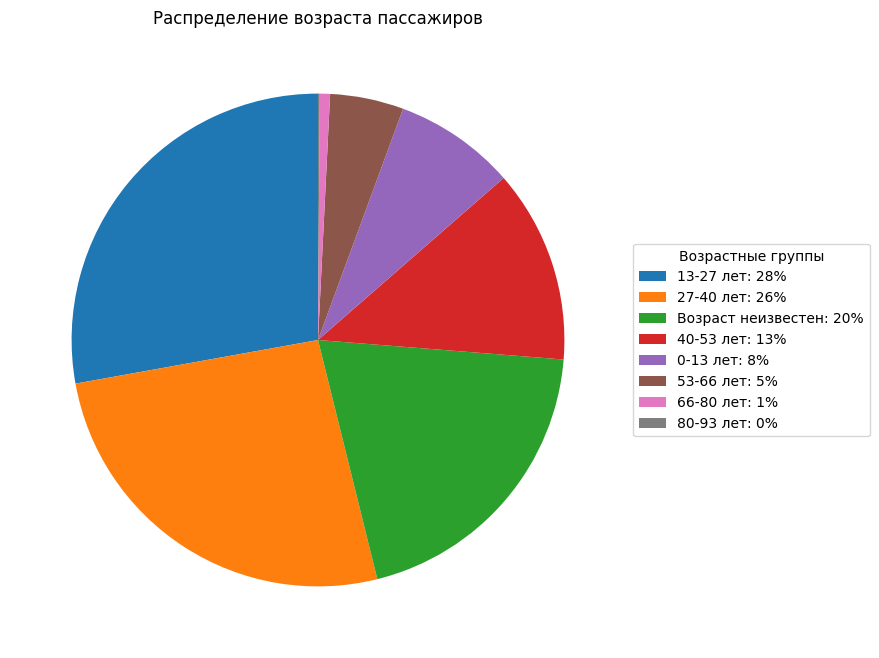

In [10]:
bins = 6
max_age = titanic["Age"].max()
min_age = titanic["Age"].min()
k = (max_age - min_age)/bins
titanic["AgeBins"] = titanic["Age"].apply(lambda x: f"{(x//k)*(k):.00f}-{((x//k)+1)*(k):.00f} лет" if pd.notnull(x) else 'Возраст неизвестен')
age_bins_counts = titanic['AgeBins'].value_counts()

plt.figure(figsize=(8, 8))
patches, texts, = plt.pie(
    age_bins_counts,
    autopct=None,
    startangle=90
)

plt.legend(patches, 
           [f'{label}: {count/len(titanic["Age"])*100:.00f}%' for label, count in zip(age_bins_counts.index, age_bins_counts)], 
           title="Возрастные группы", 
           loc="center left", 
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Распределение возраста пассажиров')

### Задание 6
Дерево решений: На основе модели дерева решений, которую вы построили в предыдущем задании, визуализируйте структуру дерева. Опишите, какие выводы можно сделать на основе полученного дерева решений.

In [37]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if "male" else "female")
X = titanic[['Sex', 'Age', 'Fare']]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [7]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1,)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=7)

Text(0.5, 1.0, 'Визуализация дерева решений')

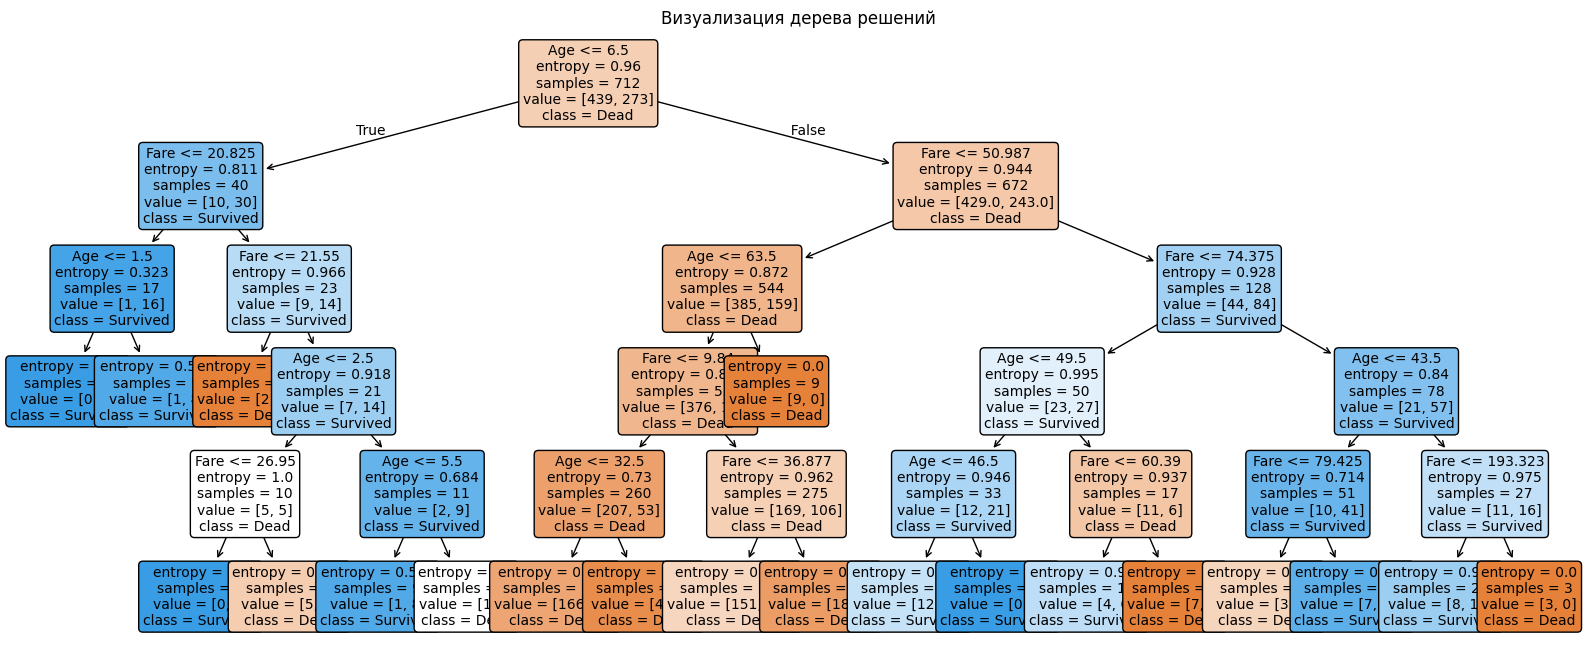

In [38]:
plt.figure(figsize=(20, 8))
tree.plot_tree(model, 
               filled=True,
               feature_names=['Sex', 'Age', 'Fare'],
               class_names=['Dead', 'Survived'],
               rounded=True,
               fontsize=10)
plt.title("Визуализация дерева решений")

Судя по изображению дерева, его можно значительно упростить, так как существуют избыточные ветки. Например можно избавиться от ветки, содержащей два крайних левых листа и заменить такую ветку одним листом, так как эти листья содержат объекты одного класса.

Судя по разделяющим признакам, в первую очередь выжили дети до 6.5 лет. Затем, если обратить внимание на правую ветку, то заметно, что велика вероятность погибнуть у пассажиров старше 64 лет. А также важным разделяющим признаком будет являться цена билета - выжило больше пассажиров с более дорогими билетами.

Можно сделать вывод, что во время катастрофы в первую очередь спасали детей, а затем богатых пассажиров среднего возраста. 